In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import os 
from pymongo import MongoClient
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
client=MongoClient('localhost',27017)
db=client['CDAC']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'CDAC')

In [14]:
collection=db.NYC_crash
df=pd.DataFrame(list(collection.find({},{'_id':0})))
df.head()

,CRASH_DATE,CRASH_TIME,LOCATION,ON_STREET_NAME,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,...,OFF_STREET_NAME,CROSS_STREET_NAME,CONTRIBUTING_FACTOR_VEHICLE_3,CONTRIBUTING_FACTOR_VEHICLE_4,CONTRIBUTING_FACTOR_VEHICLE_5,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5,LATITUDE,LONGITUDE
0,10/06/2017,18:50,"(40.72106, -73.75945)",FRANCIS LEWIS BOULEVARD,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/06/2017,15:00,"(40.7244, -73.84981)",68 DRIVE,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/04/2017,22:08,"(40.872803, -73.85428)",NaN,2.0,0.0,0,0,0,0,...,3260 BOSTON ROAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/11/2017,19:45,"(40.730293, -73.85592)",64 ROAD,1.0,0.0,1,0,0,0,...,NaN,99 STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/09/2017,13:30,"(40.78791, -73.95579)",EAST 96 STREET,0.0,0.0,0,0,0,0,...,NaN,5 AVENUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,ON STREET NAME,CROSS STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,...,LATITUDE,LONGITUDE,LOCATION,OFF STREET NAME,VEHICLE TYPE CODE 3,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,VEHICLE TYPE CODE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 5
0,11/02/2018,7:58,BRONX,10458,SOUTHERN BOULEVARD,EAST BEDFORD PARK BOULEVARD,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/08/2018,18:51,BRONX,10463,WEST 236 STREET,BROADWAY,0,0,0,0,...,40.883484,-73.901596,"(40.883484, -73.901596)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/08/2018,18:51,BRONX,10463,WEST 236 STREET,BROADWAY,0,0,0,0,...,40.883484,-73.901596,"(40.883484, -73.901596)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/08/2018,18:51,BRONX,10463,WEST 236 STREET,BROADWAY,0,0,0,0,...,40.883484,-73.901596,"(40.883484, -73.901596)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/11/2018,12:50,BROOKLYN,11237,KNICKERBOCKER AVENUE,HARMAN STREET,0,0,0,0,...,40.69939,-73.91938,"(40.69939, -73.91938)",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

In [15]:
final_df = df[['CRASH_DATE', 'CRASH_TIME', 'ZIP_CODE',
        'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'Temp', 'condition', 'precip_rate', 'dew', 'wind_speed',]]

In [16]:
final_df.reset_index(inplace=True)
del final_df['index']
final_df

,CRASH_DATE,CRASH_TIME,ZIP_CODE,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,Temp,condition,precip_rate,dew,wind_speed
0,10/06/2017,18:50,NaN,0,0,78,Partly Cloudy,0.0,56,10
1,10/06/2017,15:00,NaN,0,0,64,Partly Cloudy,0.0,57,6
2,10/04/2017,22:08,10469.0,2,0,60,Mostly Cloudy,0.0,46,9
3,10/11/2017,19:45,11374.0,0,0,39,Partly Cloudy / Windy,0.0,15,24
4,10/09/2017,13:30,10128.0,0,0,59,Fair,0.0,52,13
...,...,...,...,...,...,...,...,...,...,...
471415,10/11/2017,17:00,NaN,0,0,41,Partly Cloudy / Windy,0.0,29,24
471416,10/07/2017,23:45,10003.0,0,0,82,Mostly Cloudy,0.0,71,12
471417,10/02/2017,10:10,10301.0,0,0,20,Fair,0.0,6,17
471418,10/01/2017,0:00,11236.0,0,0,22,Cloudy,0.0,3,8


In [17]:
final_df['CRASH_TIME'] = pd.to_datetime(final_df['CRASH_TIME'])

<ipython-input-17-4a0f4927eec6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['CRASH_TIME'] = pd.to_datetime(final_df['CRASH_TIME'])


In [18]:
def transform_time(x):
    if (x.hour > 4) and (x.hour <= 8):
        return 'Early Morning'
    elif (x.hour > 8) and (x.hour <= 12):
        return 'Morning'
    elif (x.hour > 12) and (x.hour <= 16):
        return'Noon'
    elif (x.hour > 16) and (x.hour <= 20) :
        return 'Evening'
    elif (x.hour > 20):
        return'Night'
    elif (x.hour <= 4):
        return'Late Night'

final_df['day_time'] = final_df['CRASH_TIME'].apply(transform_time)

<ipython-input-18-0d1851f7e65a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['day_time'] = final_df['CRASH_TIME'].apply(transform_time)


In [19]:
final_df = final_df.dropna(axis=0, subset=['ZIP_CODE'])

In [20]:
corr_df = final_df

In [21]:
final_df['CRASH_DATE'] = pd.to_datetime(final_df['CRASH_DATE'])
final_df['crash_month'] = final_df['CRASH_DATE'].dt.month
final_df['crash_day'] = final_df['CRASH_DATE'].dt.day
del final_df['CRASH_TIME']
del final_df['CRASH_DATE']
final_df

<ipython-input-21-8a98bf5ff7b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['CRASH_DATE'] = pd.to_datetime(final_df['CRASH_DATE'])
<ipython-input-21-8a98bf5ff7b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['crash_month'] = final_df['CRASH_DATE'].dt.month
<ipython-input-21-8a98bf5ff7b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,ZIP_CODE,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,Temp,condition,precip_rate,dew,wind_speed,day_time,crash_month,crash_day
2,10469.0,2,0,60,Mostly Cloudy,0.00,46,9,Night,10,4
3,11374.0,0,0,39,Partly Cloudy / Windy,0.00,15,24,Evening,10,11
4,10128.0,0,0,59,Fair,0.00,52,13,Noon,10,9
5,11203.0,0,0,79,Mostly Cloudy,0.00,60,9,Evening,10,7
6,10310.0,0,0,71,Fair,0.00,69,7,Morning,10,7
...,...,...,...,...,...,...,...,...,...,...,...
471411,11418.0,1,0,32,Light Snow,0.01,31,13,Morning,10,12
471413,10308.0,1,0,33,Light Snow,0.06,31,13,Evening,10,3
471416,10003.0,0,0,82,Mostly Cloudy,0.00,71,12,Night,10,7
471417,10301.0,0,0,20,Fair,0.00,6,17,Morning,10,2


In [22]:
final_df['helper1'] =   final_df['NUMBER_OF_MOTORIST_KILLED']*3 + final_df['NUMBER_OF_MOTORIST_INJURED']*1
final_df

<ipython-input-22-212e3f2c6e71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['helper1'] =   final_df['NUMBER_OF_MOTORIST_KILLED']*3 + final_df['NUMBER_OF_MOTORIST_INJURED']*1


,ZIP_CODE,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,Temp,condition,precip_rate,dew,wind_speed,day_time,crash_month,crash_day,helper1
2,10469.0,2,0,60,Mostly Cloudy,0.00,46,9,Night,10,4,2
3,11374.0,0,0,39,Partly Cloudy / Windy,0.00,15,24,Evening,10,11,0
4,10128.0,0,0,59,Fair,0.00,52,13,Noon,10,9,0
5,11203.0,0,0,79,Mostly Cloudy,0.00,60,9,Evening,10,7,0
6,10310.0,0,0,71,Fair,0.00,69,7,Morning,10,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
471411,11418.0,1,0,32,Light Snow,0.01,31,13,Morning,10,12,1
471413,10308.0,1,0,33,Light Snow,0.06,31,13,Evening,10,3,1
471416,10003.0,0,0,82,Mostly Cloudy,0.00,71,12,Night,10,7,0
471417,10301.0,0,0,20,Fair,0.00,6,17,Morning,10,2,0


In [23]:
def severity_calculate(x):
    if (x > 3):
        return 'Very High'
    elif (x > 2):
        return 'High'
    elif (x > 1):
        return 'Medium'
    else:
        return 'Low'

final_df['hazard_level'] = final_df['helper1'].apply(severity_calculate)
del final_df['helper1']

<ipython-input-23-5830a770eae9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['hazard_level'] = final_df['helper1'].apply(severity_calculate)


In [24]:
corr_df

,ZIP_CODE,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,Temp,condition,precip_rate,dew,wind_speed,day_time,crash_month,crash_day,hazard_level
2,10469.0,2,0,60,Mostly Cloudy,0.00,46,9,Night,10,4,Medium
3,11374.0,0,0,39,Partly Cloudy / Windy,0.00,15,24,Evening,10,11,Low
4,10128.0,0,0,59,Fair,0.00,52,13,Noon,10,9,Low
5,11203.0,0,0,79,Mostly Cloudy,0.00,60,9,Evening,10,7,Low
6,10310.0,0,0,71,Fair,0.00,69,7,Morning,10,7,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
471411,11418.0,1,0,32,Light Snow,0.01,31,13,Morning,10,12,Low
471413,10308.0,1,0,33,Light Snow,0.06,31,13,Evening,10,3,Low
471416,10003.0,0,0,82,Mostly Cloudy,0.00,71,12,Night,10,7,Low
471417,10301.0,0,0,20,Fair,0.00,6,17,Morning,10,2,Low


In [25]:
le1 = LabelEncoder()
encoded_corr_df = corr_df[corr_df.columns[:]].apply(le1.fit_transform)
encoded_corr_df.corr()

,ZIP_CODE,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,Temp,condition,precip_rate,dew,wind_speed,day_time,crash_month,crash_day,hazard_level
ZIP_CODE,1.000000,0.068204,0.006146,-0.008631,0.001912,-0.000504,-0.005874,-0.007739,-0.017957,-0.005775,-0.012627,0.028845
NUMBER_OF_MOTORIST_INJURED,0.068204,1.000000,0.019691,0.008713,0.009045,-0.000314,0.001591,0.007202,-0.006390,0.016121,-0.002932,0.493312
NUMBER_OF_MOTORIST_KILLED,0.006146,0.019691,1.000000,0.000293,-0.000955,-0.001449,-0.001921,0.003179,-0.001755,0.002214,-0.001164,0.022821
Temp,-0.008631,0.008713,0.000293,1.000000,0.110409,0.004393,0.912246,-0.216099,-0.054941,-0.003674,0.378400,0.001574
condition,0.001912,0.009045,-0.000955,0.110409,1.000000,0.088151,0.078830,0.047330,-0.077998,0.005542,0.012588,0.004121
precip_rate,-0.000504,-0.000314,-0.001449,0.004393,0.088151,1.000000,0.075910,0.042767,-0.008326,0.001680,-0.023306,-0.001256
dew,-0.005874,0.001591,-0.001921,0.912246,0.078830,0.075910,1.000000,-0.303223,-0.002516,-0.018268,0.359093,-0.002465
wind_speed,-0.007739,0.007202,0.003179,-0.216099,0.047330,0.042767,-0.303223,1.000000,-0.075529,-0.025324,-0.116860,0.005563
day_time,-0.017957,-0.006390,-0.001755,-0.054941,-0.077998,-0.008326,-0.002516,-0.075529,1.000000,-0.005156,0.005770,-0.000915
crash_month,-0.005775,0.016121,0.002214,-0.003674,0.005542,0.001680,-0.018268,-0.025324,-0.005156,1.000000,-0.006258,0.008478


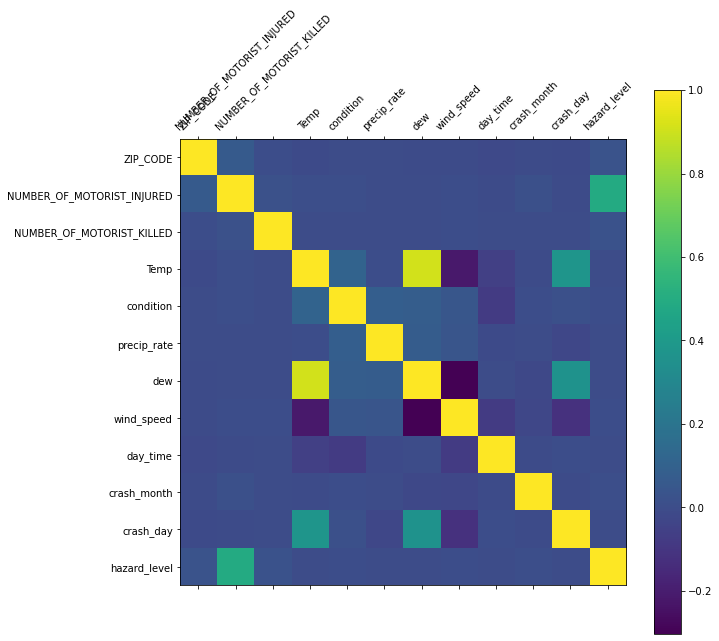

In [28]:
alp =[ 'ZIP_CODE',
        'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'Temp', 'condition', 'precip_rate', 'dew', 'wind_speed','day_time',
       'crash_month', 'crash_day','hazard_level']

#plt.matshow(final_df.corr())
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(encoded_corr_df.corr(), interpolation='nearest')
fig.colorbar(cax)

xaxis = np.arange(len(alp))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(alp, rotation=45)
ax.set_yticklabels(alp)

plt.savefig('Correlation matrix',dpi=300);
plt.show()

In [29]:
le = LabelEncoder()
encoded_df = final_df[final_df.columns[:]].apply(le.fit_transform)

In [30]:
encoded_df

,ZIP_CODE,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,Temp,condition,precip_rate,dew,wind_speed,day_time,crash_month,crash_day,hazard_level
2,113,2,0,57,29,0,59,6,4,9,3,2
3,189,0,0,36,32,0,28,19,1,9,10,1
4,59,0,0,56,4,0,65,9,5,9,8,1
5,132,0,0,76,29,0,73,6,1,9,6,1
6,92,0,0,68,4,0,82,4,3,9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
471411,202,1,0,29,24,1,44,9,3,9,11,1
471413,90,1,0,30,24,6,44,9,1,9,2,1
471416,3,0,0,79,29,0,84,8,4,9,6,1
471417,84,0,0,17,4,0,19,13,3,9,1,1


In [31]:
X = np.array(encoded_df[[ 'ZIP_CODE','day_time',
        'NUMBER_OF_MOTORIST_INJURED',
       'NUMBER_OF_MOTORIST_KILLED', 'Temp', 'condition', 'precip_rate', 'dew', 'wind_speed',]])


y = np.array(encoded_df['hazard_level'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
# Logistic Regression
clf_lr = LogisticRegression(random_state=0, max_iter=45).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
y_pred_lr = clf_lr.predict(X_test)
pred_prob_lr = clf_lr.predict_proba(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy: ", lr_acc)

Logistic Regression Accuracy:  0.9627272130717238


In [34]:
# Gradient Boost Classifier
clf_gbc = GradientBoostingClassifier(n_estimators=19, learning_rate=0.03,
                                 max_depth=1, random_state=0).fit(X_train, y_train)

In [35]:
y_pred_gbc = clf_gbc.predict(X_test)
gbc_acc = accuracy_score(y_test, y_pred_gbc)
pred_prob_gbc = clf_gbc.predict_proba(X_test)
print("Gradient Boosting Classifier: ", gbc_acc)

Gradient Boosting Classifier:  0.9737187479493405


In [36]:
# SVM
clf_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [37]:
y_pred_svm = clf_svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
#print(clf.predict([[243, 2, 36, 2]]))
print("SVM Accuracy: ", svm_acc)

SVM Accuracy:  1.0


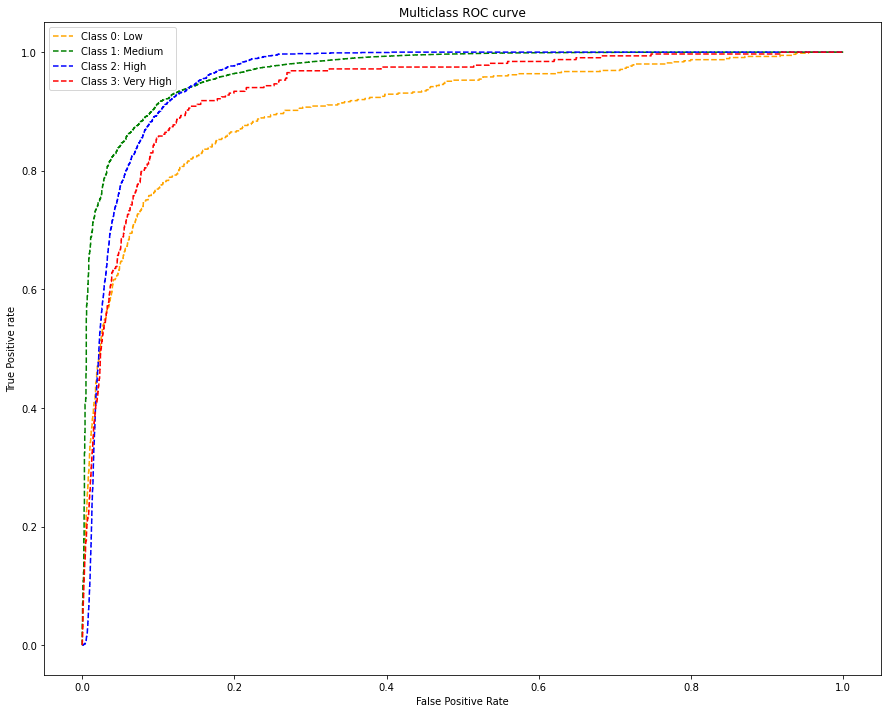

In [38]:
# multi-class classification LR
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_lr[:,i], pos_label=i)

# plotting
plt.figure(figsize=(15, 12))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0: Low')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1: Medium')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2: High')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3: Very High')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass LR ROC',dpi=300);